In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('Assets/tennis.csv')
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [3]:
#created function for label encoding
def convert_yes_no(txt):
    if 'yes' in txt:
        return 1
    else:
        return 0

In [5]:
df.windy = df.windy.astype(int)
df.play = df.play.apply(convert_yes_no)

In [6]:
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,0,0
1,sunny,hot,high,1,0
2,overcast,hot,high,0,1
3,rainy,mild,high,0,1
4,rainy,cool,normal,0,1
5,rainy,cool,normal,1,0
6,overcast,cool,normal,1,1
7,sunny,mild,high,0,0
8,sunny,cool,normal,0,1
9,rainy,mild,normal,0,1


In [7]:
df = pd.get_dummies(df,dtype=int)
df

,windy,play,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal
0,0,0,0,0,1,0,1,0,1,0
1,1,0,0,0,1,0,1,0,1,0
2,0,1,1,0,0,0,1,0,1,0
3,0,1,0,1,0,0,0,1,1,0
4,0,1,0,1,0,1,0,0,0,1
5,1,0,0,1,0,1,0,0,0,1
6,1,1,1,0,0,1,0,0,0,1
7,0,0,0,0,1,0,0,1,1,0
8,0,1,0,0,1,1,0,0,0,1
9,0,1,0,1,0,0,0,1,0,1


In [10]:
X = df.loc[:, df.columns != 'play']
X

,windy,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal
0,0,0,0,1,0,1,0,1,0
1,1,0,0,1,0,1,0,1,0
2,0,1,0,0,0,1,0,1,0
3,0,0,1,0,0,0,1,1,0
4,0,0,1,0,1,0,0,0,1
5,1,0,1,0,1,0,0,0,1
6,1,1,0,0,1,0,0,0,1
7,0,0,0,1,0,0,1,1,0
8,0,0,0,1,1,0,0,0,1
9,0,0,1,0,0,0,1,0,1


In [9]:
y = df['play']
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64

In [25]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt = DecisionTreeClassifier(criterion='entropy')

In [26]:
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [27]:
y_pred = dt.predict(X)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)  #very small data as 100% accuracy is not possible in myrida cases

1.0

In [29]:
feature = X.columns
feature

Index(['windy', 'outlook_overcast', 'outlook_rainy', 'outlook_sunny',
       'temp_cool', 'temp_hot', 'temp_mild', 'humidity_high',
       'humidity_normal'],
      dtype='object')

In [30]:
target = df.columns[1]
target

'play'

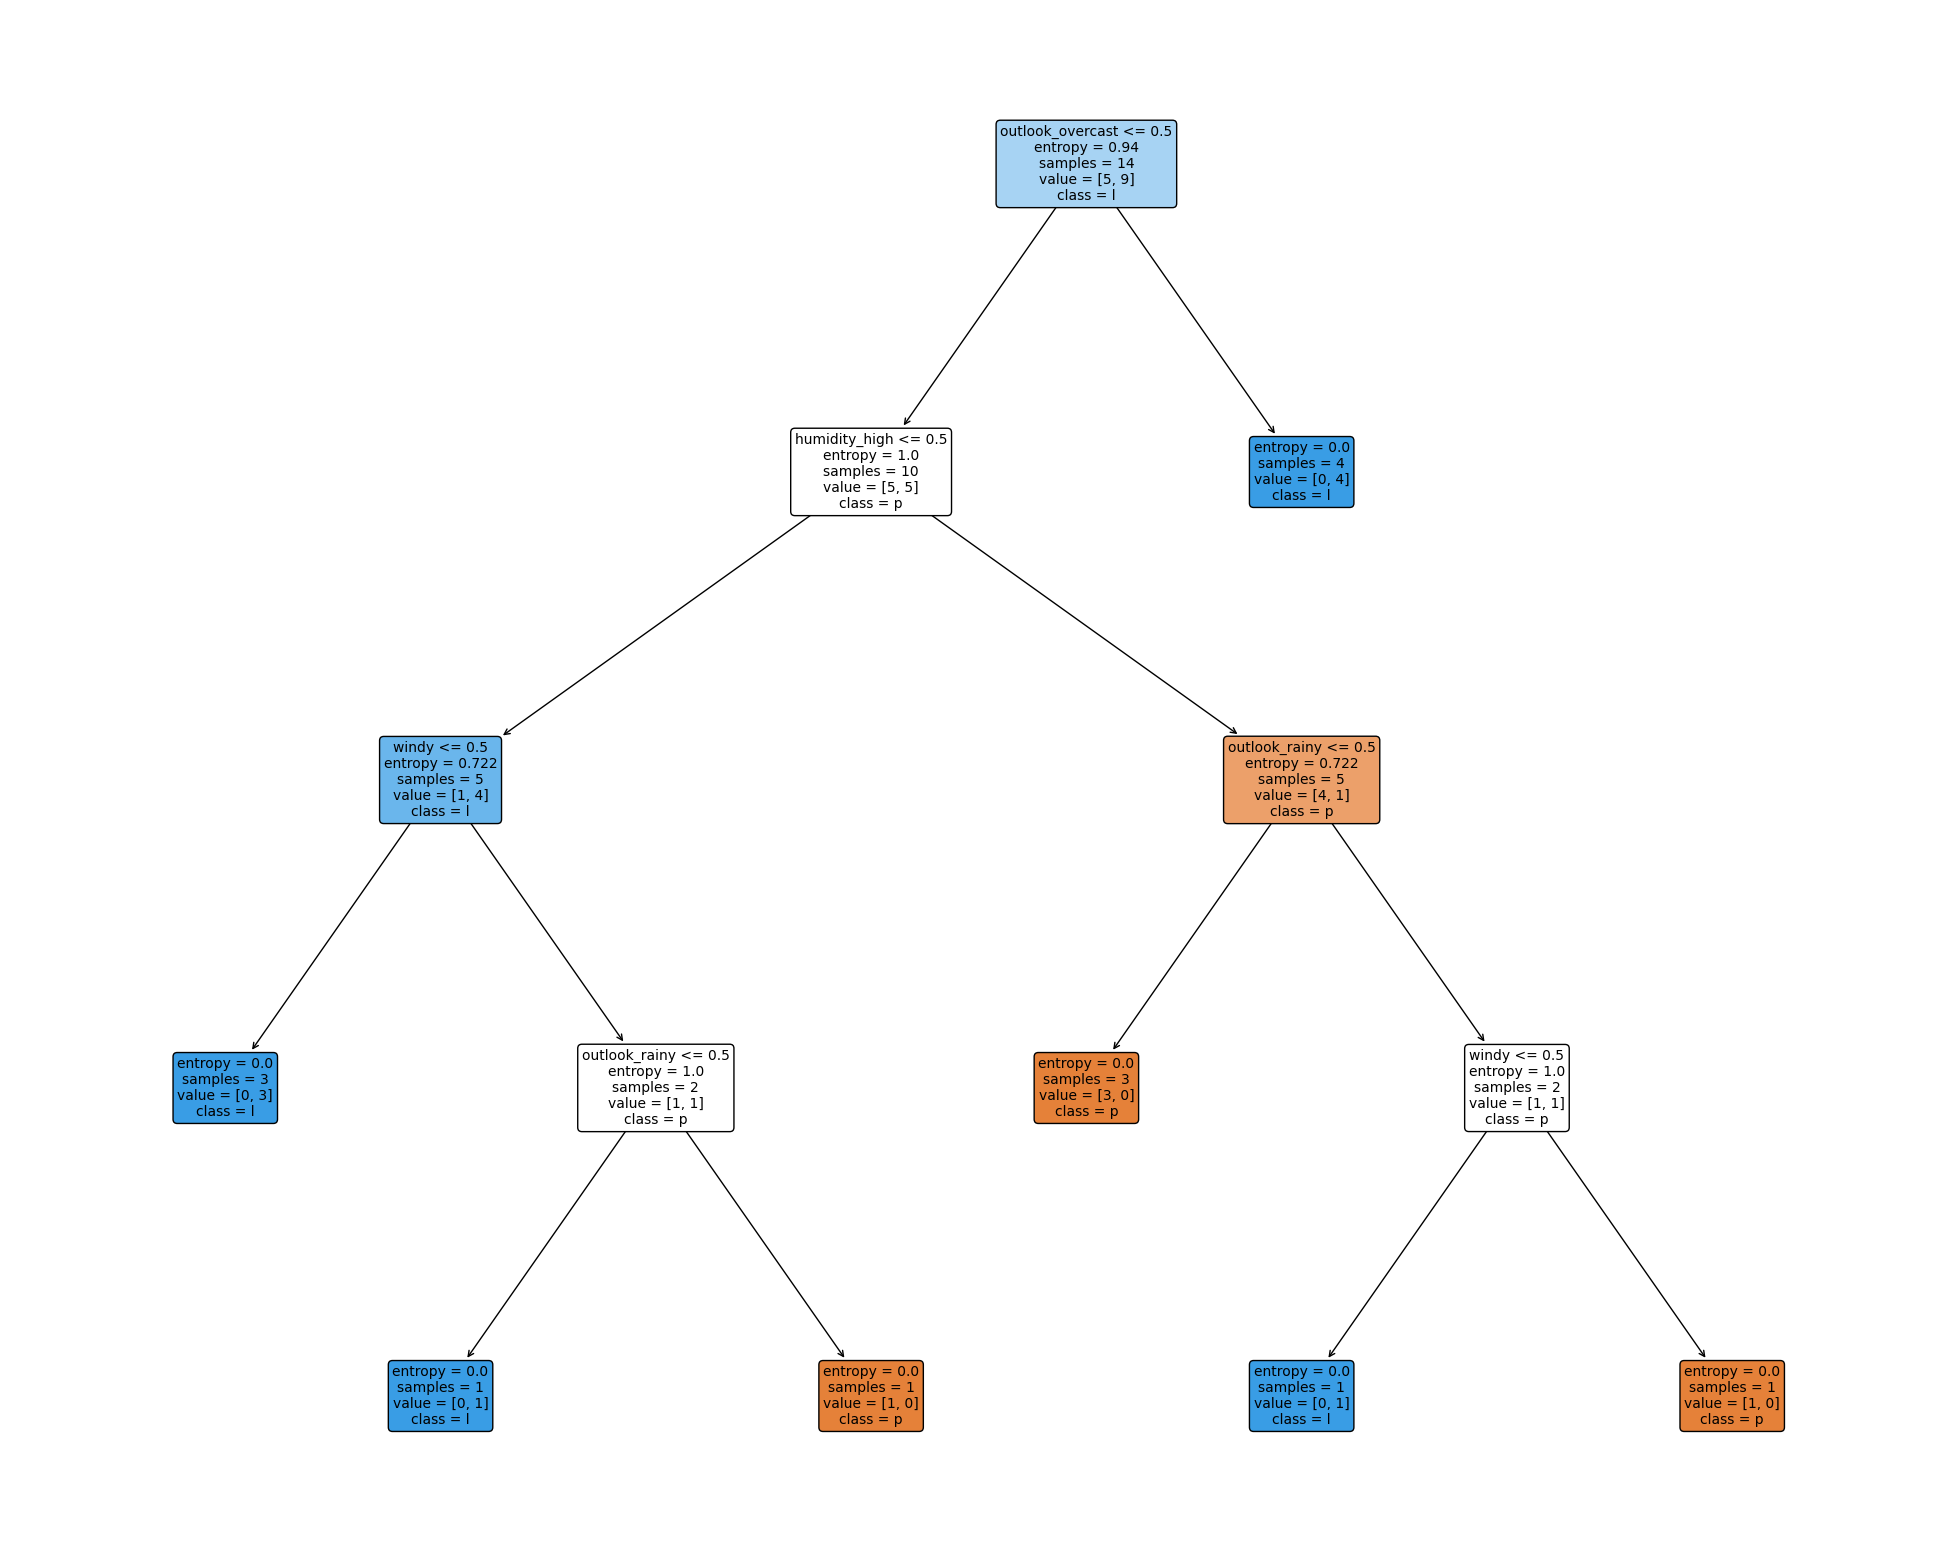

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,20))
plot_tree(dt, feature_names = feature, class_names = target, fontsize = 10, rounded= True, filled = True)
plt.show()